# <font color = #119fbf> **Análise Exploratória de Dados** </font>
# <font color = #119fbf> **Utilizando Pandas para análise de dados e Seaborn para visualização**</font>

> link para download do dataset: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results


O Dataset reúne dados históricos dos Jogos Olímpicos modernos, incluindo todos os Jogos de Atenas 1896 ao Rio 2016. A conjunto de dados é formado pelo arquivo **athlete_events.csv**, composto por 271116 amostras e 15 atributos. Cada amostra refere-se a um atleta individual competindo em um evento olímpico individual. Os atributos listados na base de dados são:
1.   ID - número único para cada atleta;
2.   Nome - nome do atleta;
3.   Sexo - M ou F;
4.   Idade - Inteiro;
5.   Altura - em centímetros;
6.   Peso - em quilogramas;
7.   Equipe - Nome da equipe;
8.   NOC - Código de três letras do Comitê Olímpico Nacional;
9.   Jogos - Ano e estação;
10.  Ano - Inteiro;
11.  Estação - Verão ou Inverno;
12.  Cidade - Cidade Anfitriã;
13.  Esporte - Esporte;
14.  Evento - Evento;
15.  Medalha - Ouro, Prata, Bronze ou NA.

Uma observação importante, os Jogos de Inverno e Verão foram realizados no mesmo ano até 1992. Depois disso, eles os escalonaram de tal forma que os Jogos de Inverno ocorrem em um ciclo de quatro anos começando em 1994, depois no verão em 1996, depois no inverno em 1998 e assim por diante. Algumas pessoas ignoram essa informação e cometem um erro ao analisar esses dados, assumir que os Jogos de Verão e Inverno sempre foram escalonados.

A partir da análise dos dados contidos no dataset alguns questionamentos podem ser feitos:

1.   Qual a participação feminina ao longo dos anos?
2.   Como é a distribuição de medalhas por países?
3.   Quais esportes favorecem mais as pessoas com baixa estatura?
4.   Quais esportes são mais novos e quais são mais antigos? 
5.   Existem alguns esportes onde as mesmas equipes sempre vencem? 
6.   E os esportes mais diversos, com vencedores de muitos lugares diferentes?




# Conhecendo a base de dados

Montagem do Drive

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Carrega dataset

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/athlete_events.csv')
df_noc = pd.read_csv('/content/gdrive/My Drive/noc_regions.csv')

Informações básicas sobre o dataset

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [0]:
#imprime as 5 primeiras linhas do dataset
df.head()

ID                      Name  ...                             Event  Medal
0   1                 A Dijiang  ...       Basketball Men's Basketball    NaN
1   2                  A Lamusi  ...      Judo Men's Extra-Lightweight    NaN
2   3       Gunnar Nielsen Aaby  ...           Football Men's Football    NaN
3   4      Edgar Lindenau Aabye  ...       Tug-Of-War Men's Tug-Of-War   Gold
4   5  Christine Jacoba Aaftink  ...  Speed Skating Women's 500 metres    NaN

[5 rows x 15 columns]

In [0]:
#imprime informações estatísticos básicos, como média, desvio padrão, valores mínimo e máximo, etc
df.describe()

ID            Age  ...         Weight           Year
count  271116.000000  261642.000000  ...  208241.000000  271116.000000
mean    68248.954396      25.556898  ...      70.702393    1978.378480
std     39022.286345       6.393561  ...      14.348020      29.877632
min         1.000000      10.000000  ...      25.000000    1896.000000
25%     34643.000000      21.000000  ...      60.000000    1960.000000
50%     68205.000000      24.000000  ...      70.000000    1988.000000
75%    102097.250000      28.000000  ...      79.000000    2002.000000
max    135571.000000      97.000000  ...     214.000000    2016.000000

[8 rows x 5 columns]

In [0]:
df.Age.describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [0]:
#checa quais atributos possuem amostras com valores nulos
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Quão completo é o conjunto de dados?

In [0]:
def NaN_percent(df, column_name):
    row_count = df[column_name].shape[0]
    empty_values = df[column_name].isnull().sum()
    return (100.0*empty_values)/row_count
for i in list(df):
    print(i +': ' +  str(NaN_percent(df,i))+'%')  

ID: 0.0%
Name: 0.0%
Sex: 0.0%
Age: 3.49444518213606%
Height: 22.193821095029435%
Weight: 23.19118015904631%
Team: 0.0%
NOC: 0.0%
Games: 0.0%
Year: 0.0%
Season: 0.0%
City: 0.0%
Sport: 0.0%
Event: 0.0%
Medal: 85.3262072323286%


#Como é a representação feminina nas Olimpíadas ao longo do tempo?


In [0]:
#Quantidade total de homens e mulheres
total_sex = df.Sex.value_counts()
total_sex

M    196594
F     74522
Name: Sex, dtype: int64

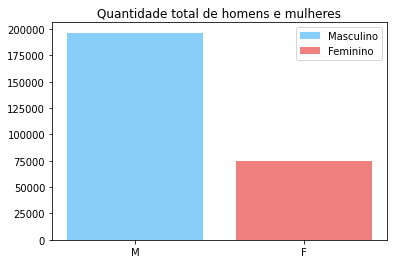

In [0]:
labels=df.Sex.value_counts().index
sizes=df.Sex.value_counts().values

plt.bar(labels[0], sizes[0], label = 'Masculino', color = 'lightskyblue')
plt.bar(labels[1], sizes[1], label = 'Feminino', color = 'lightcoral')
plt.title("Quantidade total de homens e mulheres")
plt.legend()
plt.show()
 

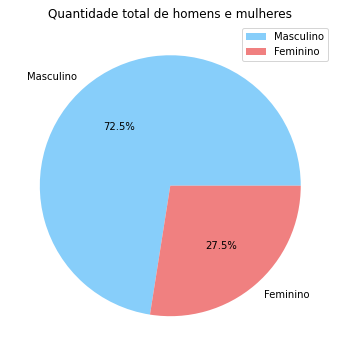

In [0]:
#Quantidade total de homens e mulheres:: gráfico em pizza
labels = ['Masculino',"Feminino"]
sizes=df.Sex.value_counts().values
explode=[0,0]
colors = ['lightskyblue', 'lightcoral']

plt.figure(figsize=(10,6))
plt.pie(sizes,explode,labels, autopct="%1.1f%%", colors=colors)
plt.title("Quantidade total de homens e mulheres")
plt.legend()
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f10d0f38e10>,
 Text(0.5, 1.0, 'Distribuição de participação feminina ao longo dos anos'))

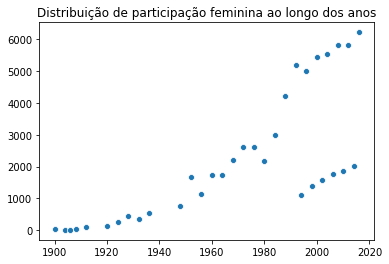

In [0]:
#distribuição de participação feminina ao longo dos anos
f_year_count = df[df.Sex=='F'].groupby('Year').count().Name

(sns.scatterplot(data = f_year_count), plt.title("Distribuição de participação feminina ao longo dos anos"))

(<matplotlib.axes._subplots.AxesSubplot at 0x7f10ccd000f0>,
 Text(0.5, 1.0, 'Comparativo de participantes por gênero ao longo dos anos'))

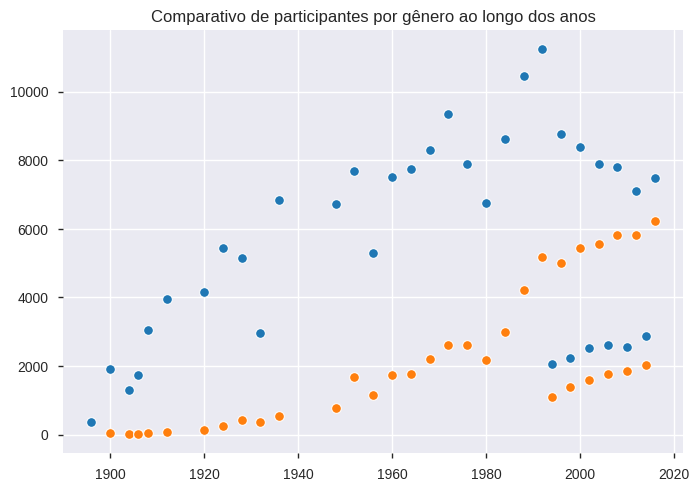

In [0]:
#distribuição de participação feminina e masculina ao longo dos anos

f_year_count = df[df.Sex=='F'].groupby('Year').count().Name
m_year_count = df[df.Sex=='M'].groupby('Year').count().Name

(sns.scatterplot(data=m_year_count), sns.scatterplot(data=f_year_count), plt.title("Comparativo de participantes por gênero ao longo dos anos"))

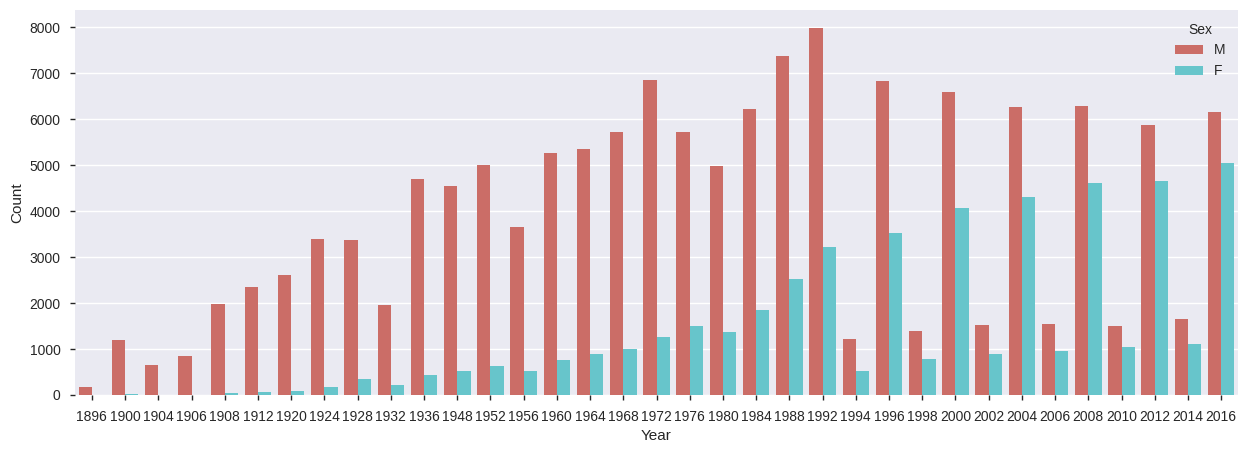

In [0]:
#distribuição de participação feminina e masculina ao longo dos anos

year_sex = df.loc[:,["Year", "ID", "Sex"]].drop_duplicates().groupby(["Year", "Sex"]).size().reset_index()
year_sex.columns = ["Year","Sex","Count"]

plt.figure(figsize=(15, 5))
sns.barplot(x="Year", y="Count", hue="Sex", data = year_sex, palette="hls")

plt.show()

Text(0.5, 1.0, 'Medalhas por gênero')

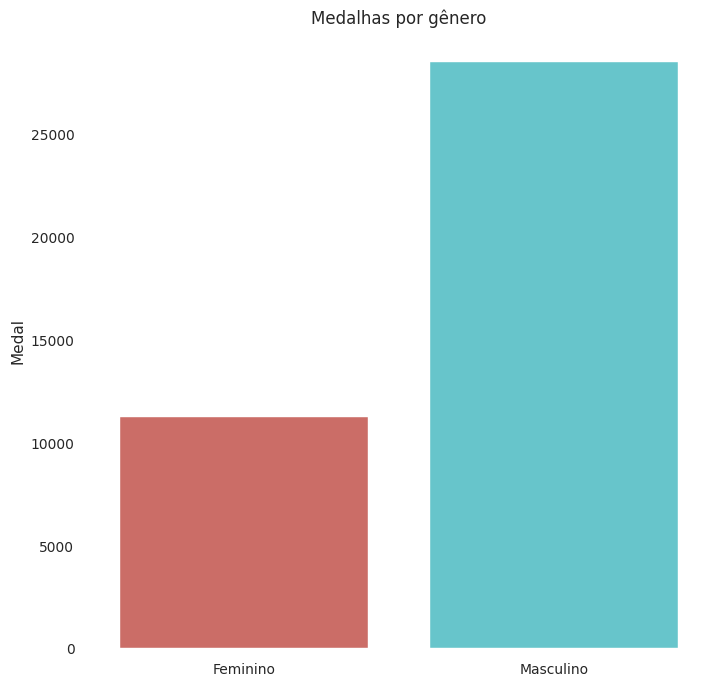

In [0]:
#Total de medalhas ao longo dos anos por gênero
total_medals = df.groupby('Sex')['Medal'].count().reset_index()
labels = ["Feminino", 'Masculino']

plt.figure(figsize=(8, 8))
sns.set_style("whitegrid", {'axes.grid' : False})

sns.barplot(x=labels, y="Medal",data=total_medals,palette="hls")
plt.title('Medalhas por gênero')


In [0]:
#Jogos Olímpicos de Verão a partir de 1924 
df_summer = df[(df.Season == 'Summer') & (df.Year >= 1924)]

#Jogos Olímpicos de Inverno a partir de 1924
df_winter = df[(df.Season == 'Winter') & (df.Year >= 1924)]

df_winter_ages = df_winter.groupby(['Year','Sex'], as_index=False)['Age','Sex'].agg('mean')
df_summer_ages = df_summer.groupby(['Year','Sex'], as_index=False)['Age','Sex'].agg('mean')

df_winter_ages.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Year Sex        Age
0  1924   F  25.625000
1  1924   M  27.671835
2  1928   F  26.178571
3  1928   M  26.605603
4  1932   F  22.571429

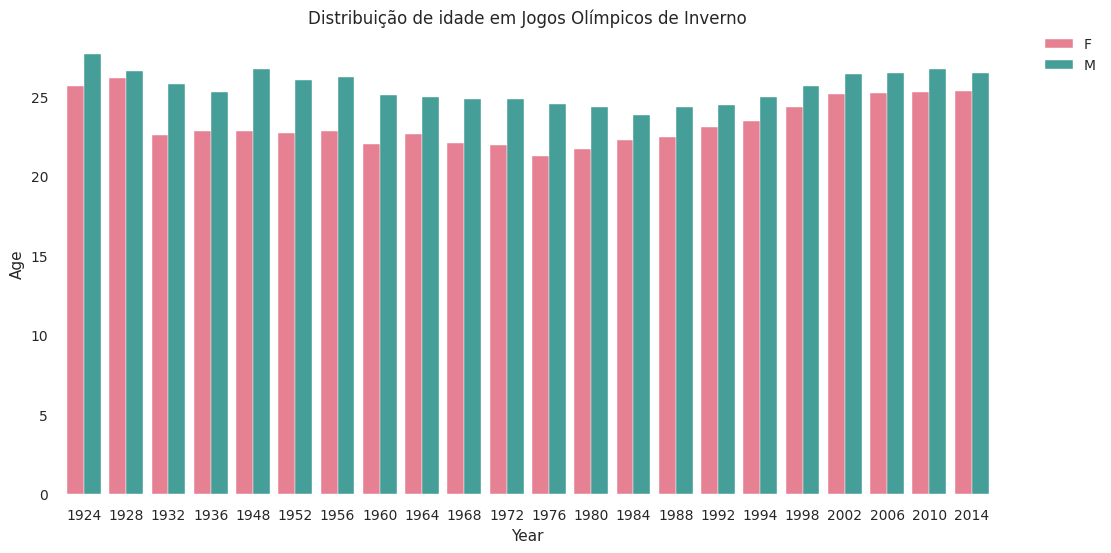

In [0]:
#Jogos Olímpicos de Inverno a partir de 1924 

plt.figure(figsize=(12,6))
sns.barplot(x="Year", y="Age", data=df_winter_ages, hue="Sex", palette="husl")
plt.title('Distribuição de idade em Jogos Olímpicos de Inverno') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

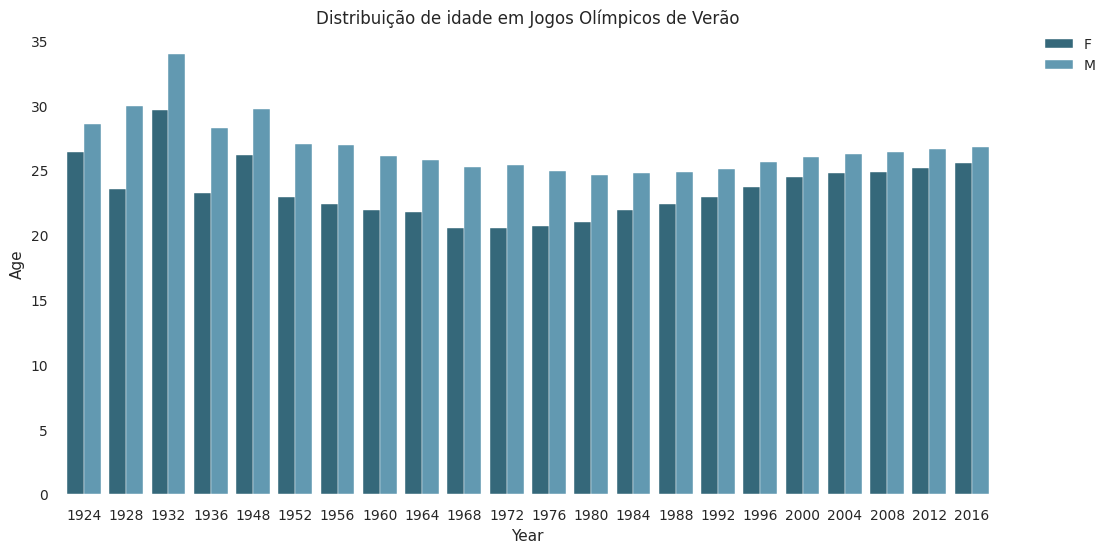

In [0]:
plt.figure(figsize=(12,6))
sns.barplot(x="Year", y="Age", data=df_summer_ages, hue="Sex", palette="PuBuGn_d")
plt.title('Distribuição de idade em Jogos Olímpicos de Verão') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [0]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [0]:
# Devido o Plotly estar sendo utilizado no Google Collab, precisaremos definir
# a função abaixo e chamá-la sempre que quisermos exibir um gráfico

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

Text(0.5, 1.0, '10 esportes mais populares no gênero feminino')

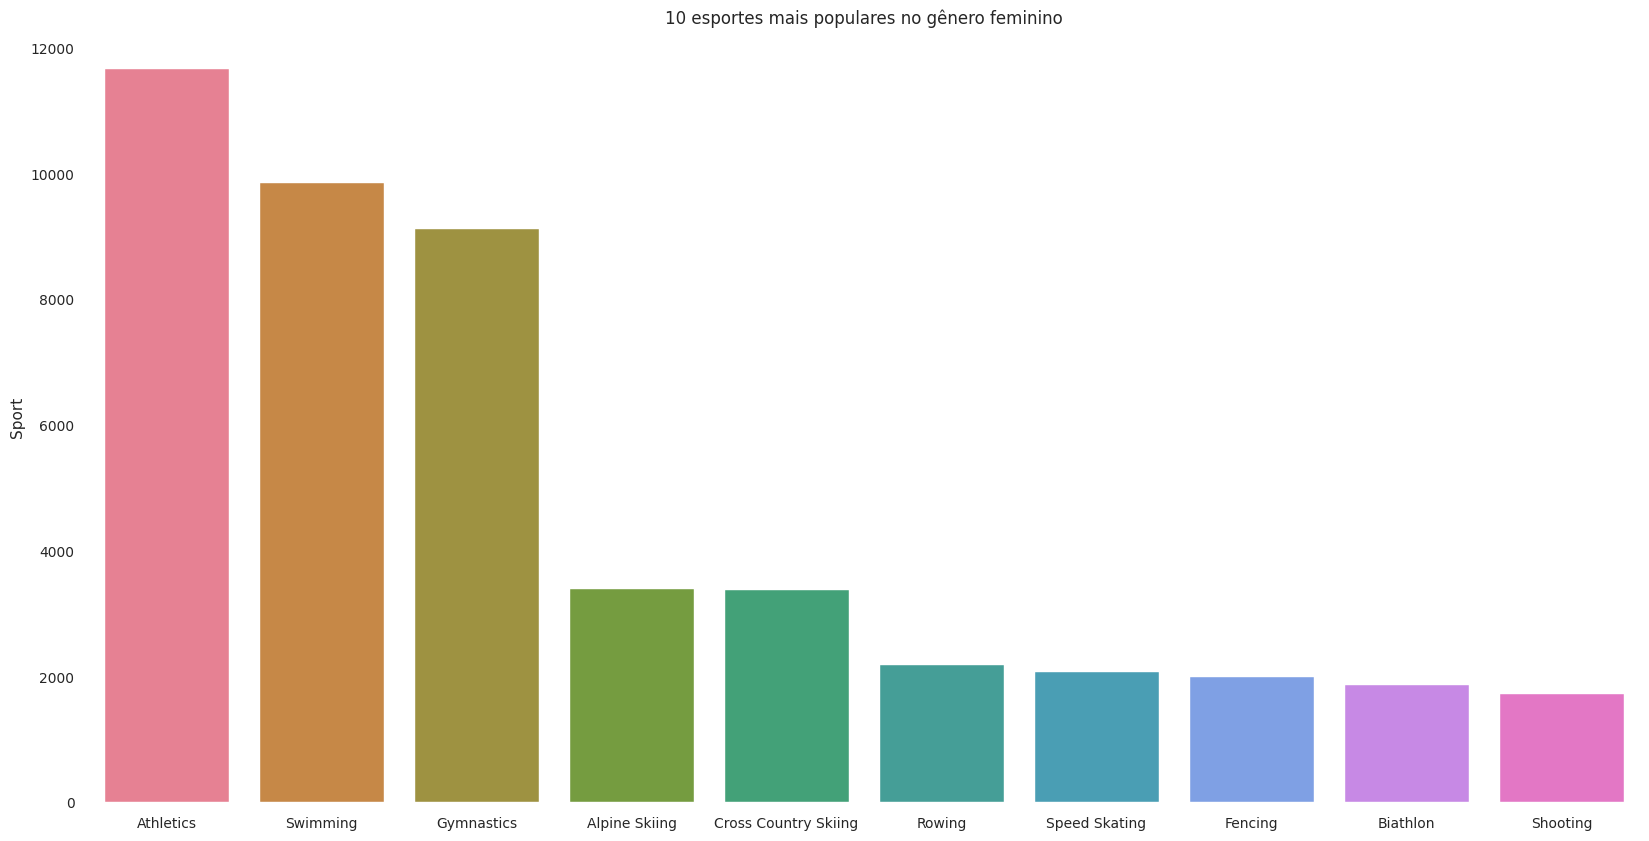

In [0]:
plt.figure(figsize=(20, 10))
f_tops = df[df['Sex'] == 'F']['Sport'].value_counts().head(n=10)
sns.barplot(x=f_tops.index, y=f_tops, palette="husl")
plt.title('10 esportes mais populares no gênero feminino') 



# Distribuição de medalhas por países

In [0]:
df_merge = df.merge(df_noc)
df_merge.rename(columns={'region':'Country'}, inplace=True)

df_merge.head()


ID           Name Sex  ...  Medal  Country  notes
0     1      A Dijiang   M  ...    NaN    China    NaN
1     2       A Lamusi   M  ...    NaN    China    NaN
2   602  Abudoureheman   M  ...    NaN    China    NaN
3  1463      Ai Linuer   M  ...    NaN    China    NaN
4  1464      Ai Yanhan   F  ...    NaN    China    NaN

[5 rows x 17 columns]

In [0]:

tmp = df_merge.groupby(['Country', 'Medal'])['ID'].agg('count').dropna()
df_medals = pd.DataFrame(tmp).reset_index()

In [0]:
dfG = df_medals[df_medals['Medal']=='Gold']
dfS = df_medals[df_medals['Medal']=='Silver']
dfB = df_medals[df_medals['Medal']=='Bronze']

def draw_map(dataset, title, colorscale):
    trace = go.Choropleth(
                locations = dataset['Country'],
                locationmode='country names',
                z = dataset['ID'],
                text = dataset['Country'],
                autocolorscale =False,
                reversescale = True,
                colorscale = colorscale,
                marker = dict(
                    line = dict(
                        color = 'rgb(0,0,0)',
                        width = 0.5)
                ),
                colorbar = dict(
                    #title = 'Medals',
                    tickprefix = '')
            )
    data = [trace]
    layout = go.Layout(
        #title = title,
        geo = dict(
            showframe = True,
            showlakes = False,
            showcoastlines = True,
            projection = dict(
                type = 'natural earth'
            )
        )
    )
    fig = dict(data=data, layout=layout)
    iplot(fig)

In [0]:
#Medalhas de ouro
configure_plotly_browser_state()

draw_map(dfG, "Países com medalhas de ouro",'Oryel')

In [0]:
#Medalhas de Prata
configure_plotly_browser_state()

draw_map(dfS, "Países com medalhas de prata",'Greys')

In [0]:
#Medalha de bronze
configure_plotly_browser_state()

draw_map(dfB, "Países com medalhas de bronze",'Reds')

# Ferramenta Profile


In [0]:
# instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [0]:
!pip uninstall pandas-profiling
!pip install pandas-profiling[notebook,html]


Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-1.4.1
     |████████████████████████████████| 266kB 2.8MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 3.1MB 47.2MB/s 
     |████████████████████████████████| 614kB 47.4MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 112kB 37.3MB/s 
     |████████████████████████████████| 296kB 45.6MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=8e98e6125da08b3afb9afb5459523c72e58aec98db7cbe587667b3e9aadd745a
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=92ec

In [0]:
# import o ProfileReport
from pandas_profiling import ProfileReport

In [0]:
# executando o profile
profile = ProfileReport(df, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})

In [0]:
profile

In [0]:
# salvando o relatório no disco
profile.to_file(output_file="Relatorio01.html")

# Exercício 1 - Quais esportes com as menores médias de altura de seus atletas?

In [0]:
#resolução

#Dataframe com as informações dos esportes e suas respectivas médias de altura
df_sports_height = df.groupby(['Sport'], as_index=False)['Height'].agg('mean')
df_sports_height

Sport      Height
0        Aeronautics         NaN
1      Alpine Skiing  173.489052
2           Alpinism         NaN
3            Archery  173.203085
4   Art Competitions  174.644068
..               ...         ...
61        Tug-Of-War  182.480000
62        Volleyball  186.994822
63        Water Polo  184.834648
64     Weightlifting  167.824801
65         Wrestling  172.358586

[66 rows x 2 columns]

In [0]:
# É possível organizar o dataframe a partir da coluna de altura em ordem crescente de altura
df_sports_height = df_sports_height.sort_values(by='Height', ascending=True)
# foi amarzenado apenas os 10 primeiros elementos do dataframe, que é o interesse da questão
df_sports_height = df_sports_height.head(10)
df_sports_height

Sport      Height
27                 Gymnastics  162.936020
59               Trampolining  166.582781
20                     Diving  166.634264
64              Weightlifting  167.824801
41        Rhythmic Gymnastics  167.870253
23             Figure Skating  168.202160
55      Synchronized Swimming  168.481481
52                   Softball  169.395089
48  Short Track Speed Skating  170.108199
25           Freestyle Skiing  171.012959

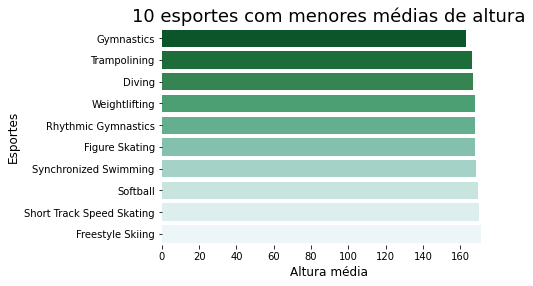

In [0]:
#Opção 1 de gráfico
g = sns.barplot(x="Height", y="Sport", data=df_sports_height, palette="BuGn_r")
g.axes.set_title('10 esportes com menores médias de altura', fontsize=18,color="black",alpha=2)
g.set_xlabel("Altura média", size = 12,color="black")
g.set_ylabel("Esportes", size = 12,color="black")
sns.despine(left=True, bottom=True)


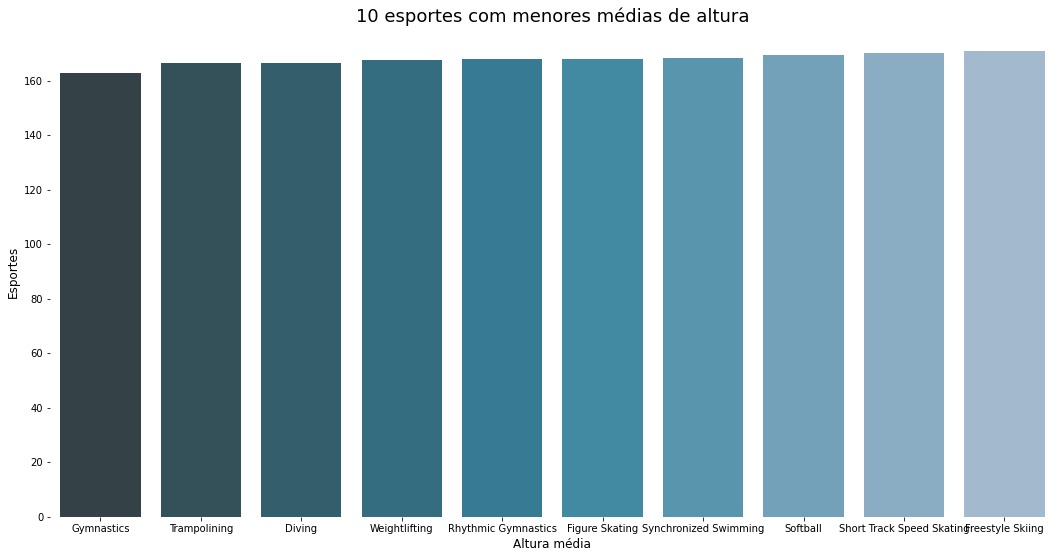

In [0]:
#Opção 2 de gráfico

plt.figure(figsize=(18, 9))
g = sns.barplot(x="Sport", y="Height", data=df_sports_height, palette="PuBuGn_d")
g.axes.set_title('10 esportes com menores médias de altura', fontsize=18,color="black",alpha=2)
g.set_xlabel("Altura média", size = 12,color="black")
g.set_ylabel("Esportes", size = 12,color="black")
sns.despine(left=True, bottom=True)

# Exercício 2 - Quais esportes são mais novos e quais são mais antigos?

In [0]:
df_sports_year = df.groupby(['Sport'], as_index=False)['Year'].agg('min')
df_sports_year

Sport  Year
0        Aeronautics  1936
1      Alpine Skiing  1936
2           Alpinism  1924
3            Archery  1900
4   Art Competitions  1912
..               ...   ...
61        Tug-Of-War  1900
62        Volleyball  1964
63        Water Polo  1900
64     Weightlifting  1896
65         Wrestling  1896

[66 rows x 2 columns]

In [0]:
#Tabela que exibe os 5 esportes mais antigos

df_sports_old = df_sports_year.sort_values(by='Year', ascending=True)
df_sports_old.head(5)

Sport  Year
65      Wrestling  1896
64  Weightlifting  1896
5       Athletics  1896
27     Gymnastics  1896
58         Tennis  1896

In [0]:
#Tabela que exibe os 5 esportes mais recentes

df_sports_recent = df_sports_year.sort_values(by='Year', ascending=False)
df_sports_recent.head(5)

Sport  Year
45  Rugby Sevens  2016
60     Triathlon  2000
59  Trampolining  2000
57     Taekwondo  2000
51  Snowboarding  1998

# Exercício 3 - Extraia do dataset apenas informações sobre atletas brasileiros. Como estão distribuídos os altetlas brasileiros ao longo das edições, conforme o gênero dos atletas?

In [0]:
#Extração dos atletas que possuem a coluna Country == "Brazil", organizados por ano
df_br = df_merge[(df_merge.Country == 'Brazil')].sort_values('Year')
df_br.head()

ID                               Name Sex  ...  Medal  Country  notes
180975  61291  Adolphe Christiano Klingelhoeffer   M  ...    NaN   Brazil    NaN
180976  61291  Adolphe Christiano Klingelhoeffer   M  ...    NaN   Brazil    NaN
180977  61291  Adolphe Christiano Klingelhoeffer   M  ...    NaN   Brazil    NaN
180482  35925               Ernesto Flores Filho   M  ...    NaN   Brazil    NaN
180576  38247                      ngelo Gammaro   M  ...    NaN   Brazil    NaN

[5 rows x 17 columns]

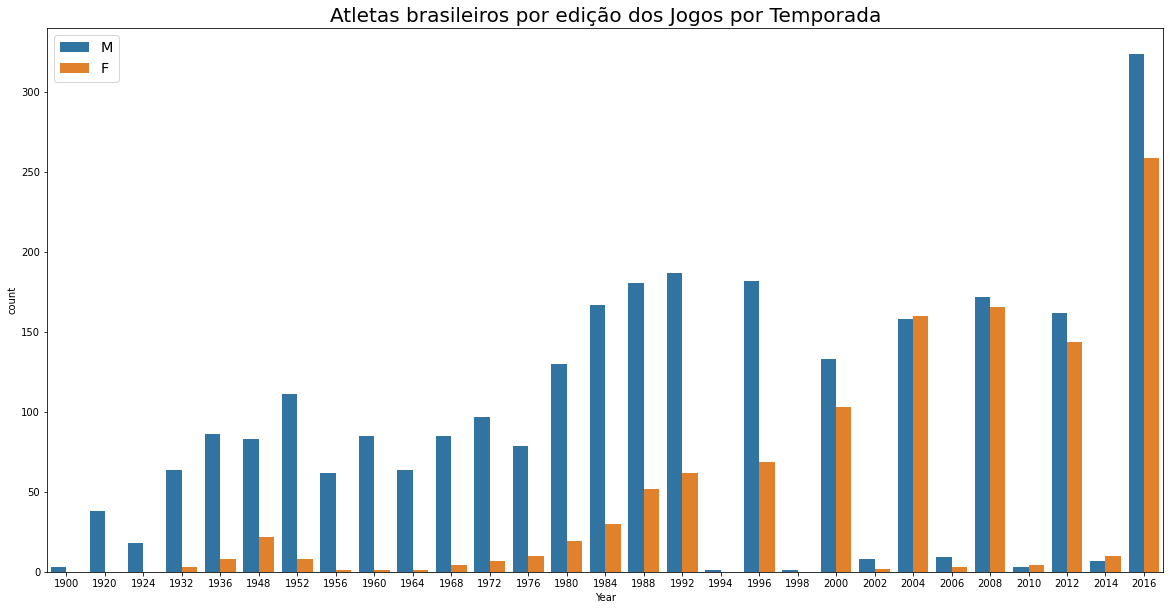

In [0]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', hue='Sex',data=df_br)
plt.title('Atletas brasileiros por edição dos Jogos por gênero', fontsize = 20)
plt.legend(loc=2, fontsize='x-large')
plt.show()

# Exercício 4 - Visualize graficamente a relação entre Altura e Peso dos atletas brasileiros.

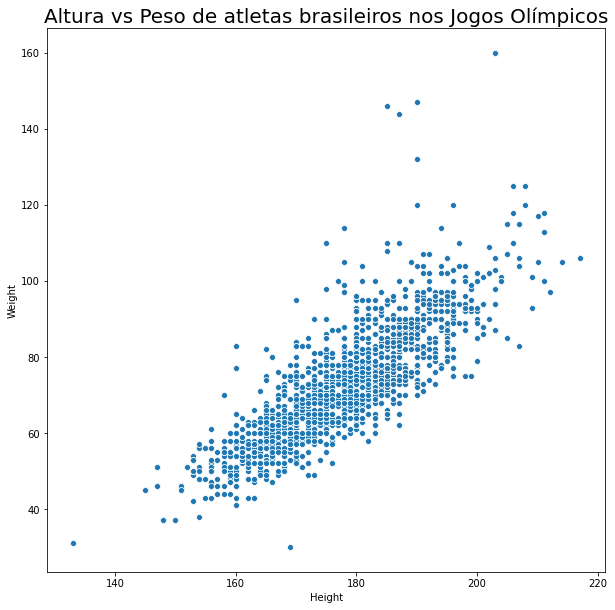

In [0]:
#O gráfico de dispersão funciona bem para visualizar esse tipo de relação entre duas variáveis
plt.figure(figsize=(10, 10))
sns.scatterplot(x="Height", y="Weight", data=df_br.sort_values('Year'))
plt.title('Altura vs Peso de atletas brasileiros nos Jogos Olímpicos', fontsize=20)
plt.show()

# Exercício 5 - Implemente o gráfico anterior incluindo na análise a coluna de Medalhas, isto é, exiba a altura vs peso dos altletas brasileiros medalhistas de ouro, prata e bronze. 

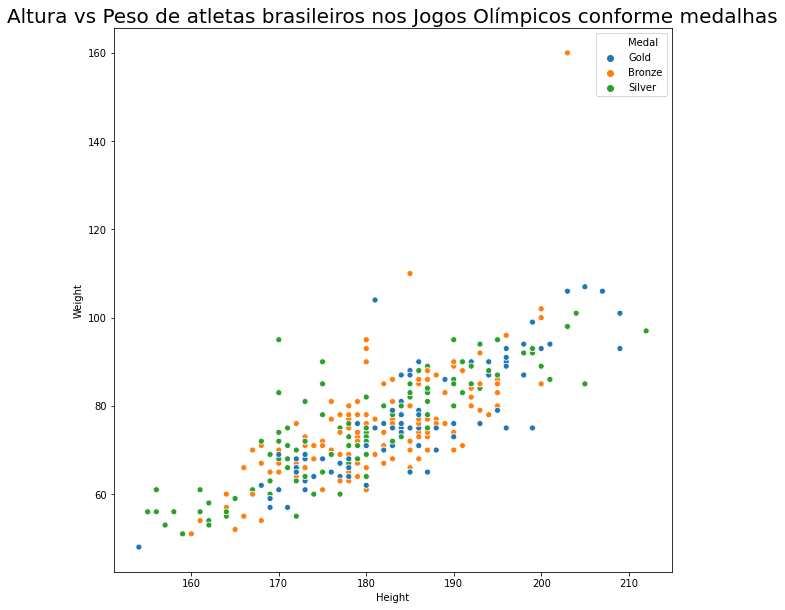

In [0]:
# Adicionando ao código do Exercício 4 o parâmetro HUE no scatterplot, para que os dados sejam agrupados nas categorias disponíveis no atributo Medalhas


plt.figure(figsize=(10, 10))
sns.scatterplot(x="Height", y="Weight", hue="Medal",data=df_br.sort_values('Year'))
plt.title('Altura vs Peso de atletas brasileiros nos Jogos Olímpicos conforme medalhas', fontsize=20)
plt.show()

# Exercício 6 - Extraia do dataset apenas atletas brasileiros medalhista de ouro. Implemente um gráfico com o comportamento da idade dos atletas medalhistas de acordo com o gênero.

In [0]:
#Dataframe formado com apenas informações de Medalhistas de ouro
df_br_gold = df_br[(df_br.Medal == 'Gold')]


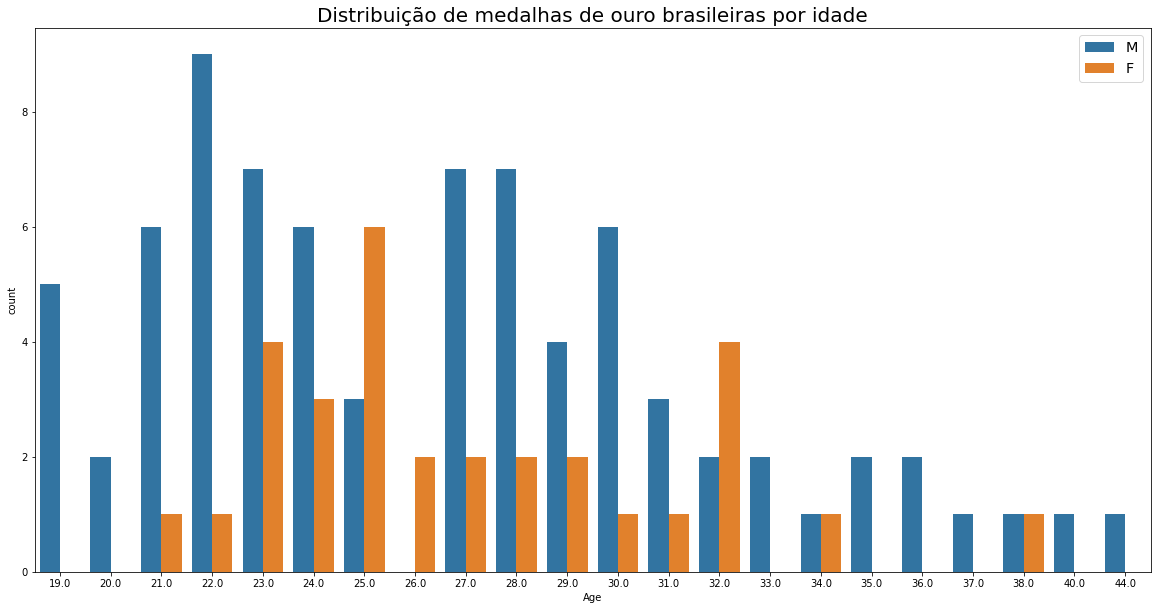

In [0]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Age', hue='Sex', data=df_br_gold)
plt.title('Distribuição de medalhas de ouro brasileiras por idade', fontsize = 20)
plt.legend(loc=1, fontsize='x-large')
plt.show()